# Find recurrent patterns in a neural signal using Sliding Window Matching

This notebook shows how to implement sliding window matching (SWM) for identifying recurrent patterns in a neural signal, like the shape of an oscillatory waveform. For more details, see [Gips et al., 2017, J Neuro Methods](http://www.sciencedirect.com/science/article/pii/S0165027016302606).

In [3]:
import numpy as np
from neurodsp.swm import sliding_window_matching

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

### Load neural signal

Text(0,0.5,'Voltage (uV)')

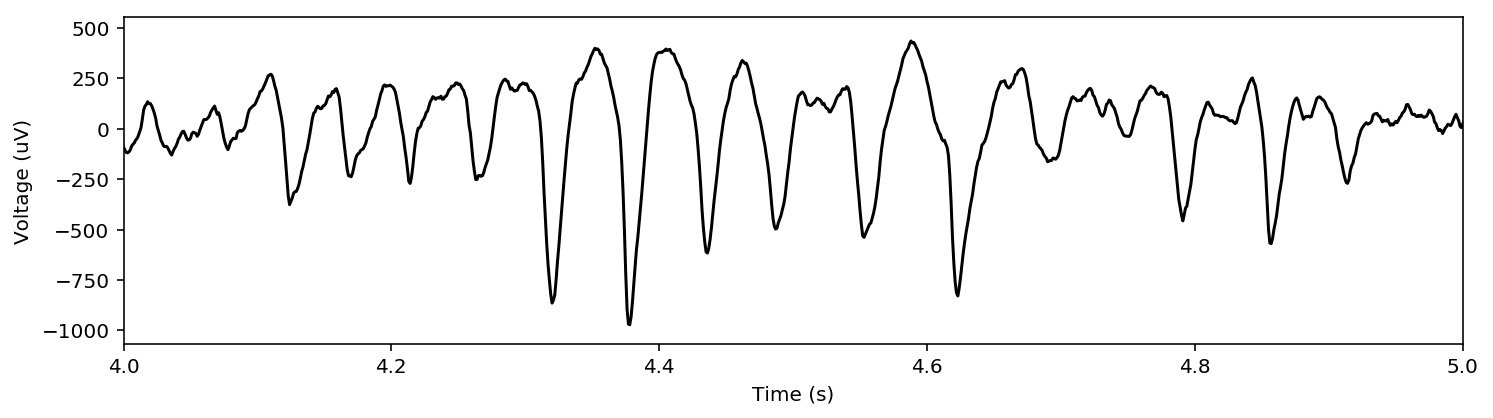

In [4]:
# Load signal
sig = np.load('./data/sample_data_1.npy')
sig_filt_true = np.load('./data/sample_data_1_filt.npy')
Fs = 1000
t = np.arange(0, len(sig)/Fs, 1/Fs)
f_range = (13,30)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, sig, 'k')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

# Apply sliding window matching to neural signal
Because we define the window length to be about 1 cycle, this should roughly extract the waveform shape of the neural oscillation. Notice that the beta cycles have sharper troughs than peaks, and the average window is a beta cycle with a sharp trough.

However, notice that these results change dramatically by changing the random seed. Using more data and increasing the number of iterations would help the robustness of the algorithm.

Text(0.5,1,'Average pattern in neural signal')

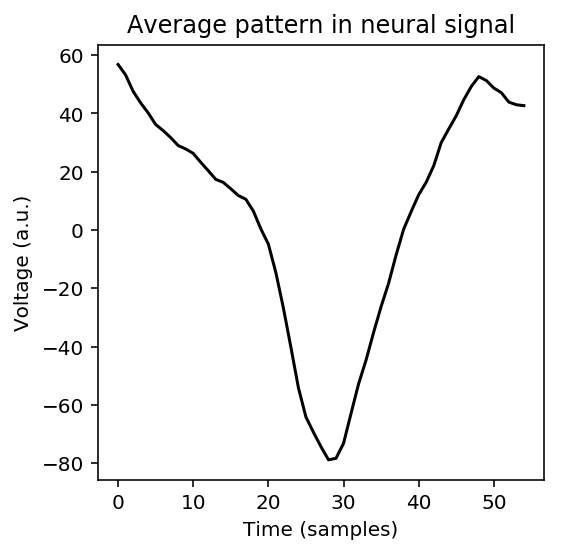

In [5]:
# Define window length, in seconds
L = .055

# Define minimum window spacing, in seconds
G = .2

np.random.seed(1)
avg_window, window_starts, J = sliding_window_matching(sig, Fs, L, G, max_iterations=500)

plt.figure(figsize=(4,4))
plt.plot(avg_window, 'k')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage (a.u.)')
plt.title('Average pattern in neural signal')